In [3]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
import random
import matplotlib.pylab as plt
from glob import glob
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import models
import keras

In [84]:
def show_image_prediction(x, prediction, labels, right_label):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.title(right_label)
    plt.imshow(x.reshape((299,299)), cmap='gray')
    
    plt.subplot(1,2,2)
    p_max = prediction[0].max()
    
    plt.bar(LABELS, prediction[0]/p_max,width = 0.4)

    pred_label_index = np.where(prediction[0]==p_max)[0][0]
    plt.title('NN prediction')
    plt.show()
    
def _count_not_zero_pixels(image_pixels):
    size = len(image_pixels)*len(image_pixels[0])
    not_empty_pixels = 0
    for pixels_row in image_pixels:
        for pixel in pixels_row:
            if (pixel > 0):
                not_empty_pixels+=1
    return not_empty_pixels/size
    
def _show_layer(model, image_bits, layer_index, min_intensity, min_not_zero_pixels_count, use_image_max_value):
    intermediate_layer_model = keras.Model(inputs=model.input, outputs=model.layers[layer_index].output)
        
    output = intermediate_layer_model.predict(image_bits)
    max_layer_value = output.max()
    
    image_index = 0
    plt.figure(figsize=(35,100))
    for i in range(output.shape[3]):
        image_pixels = output[:,:,:,i][0]
        max_image_value = image_pixels.max()
        not_zero_pixels_count = _count_not_zero_pixels(image_pixels)
        if (max_image_value > min_intensity and not_zero_pixels_count > min_not_zero_pixels_count):
            image_index+=1

            plt.subplot(32,12,image_index)
            plt.title(f'{i} | {max_image_value:.2f} | {not_zero_pixels_count:.2f}')
            plt.imshow(image_pixels, cmap='inferno', vmax=max_image_value if (use_image_max_value) else max_layer_value, vmin=0)

def show_inside_layers(model, image_bits, only_last, min_intensity = 0.0, min_not_zero_pixels_count = -1.0, use_image_max_value = False):
    conv2d_indexes = []
    for i, layer in enumerate(model.layers):
        if(isinstance(layer, Conv2D)):
            conv2d_indexes.append(i)
            
    if (only_last):
        _show_layer(model, image_bits, conv2d_indexes[-1], min_intensity, min_not_zero_pixels_count, use_image_max_value)
    else:
        for layer_index in conv2d_indexes:
            _show_layer(model, image_bits, layer_index, min_intensity, min_not_zero_pixels_count, use_image_max_value)

In [5]:
LABELS = ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

X = np.load('X_test.npy')
y = np.load('y_test.npy')

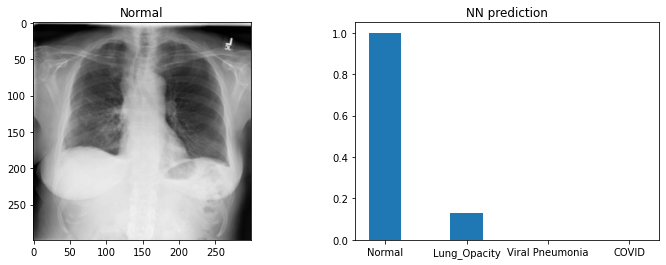

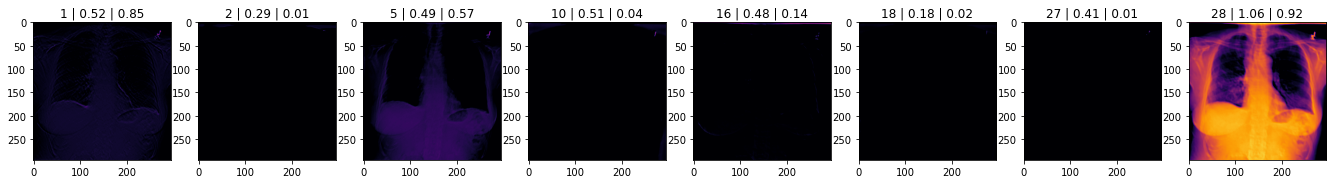

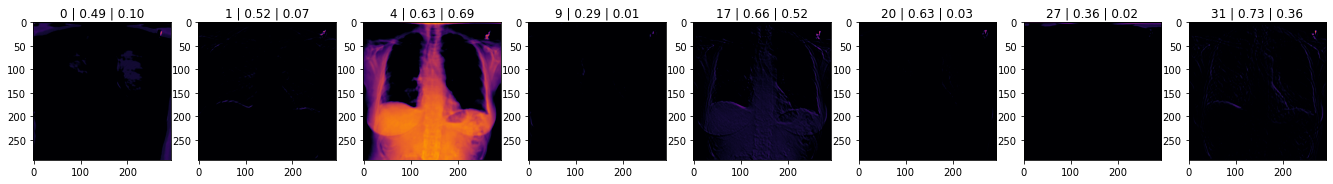

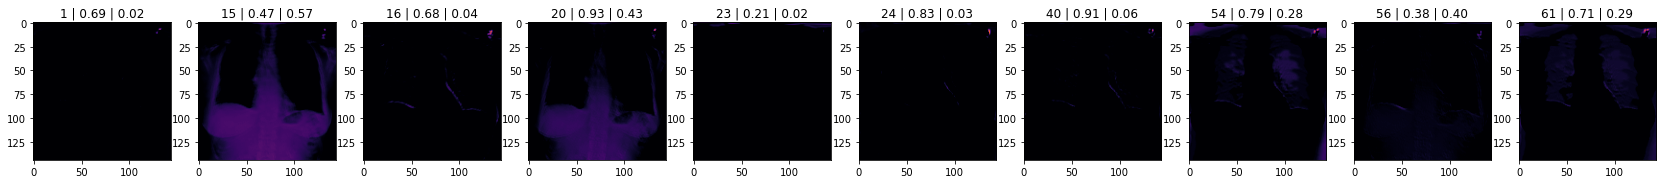

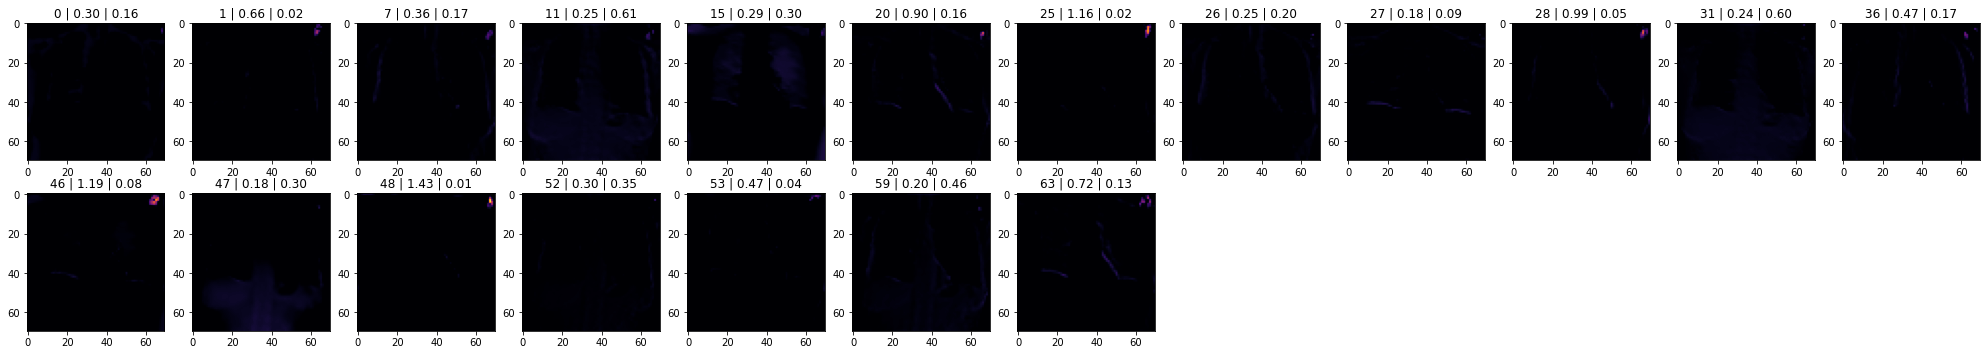

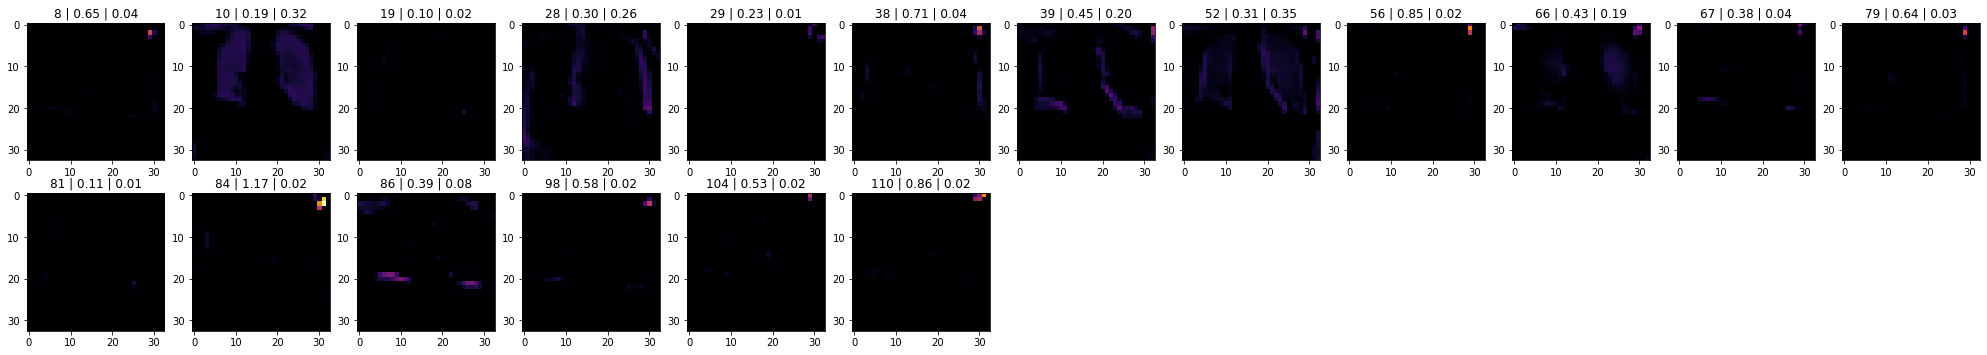

In [85]:
path = '6_2/epoch3.h5'
model = models.load_model('checkpoints/'+path)

# index = random.randrange(len(y))
index = 50
image_bits = X[index].reshape((1,299,299,1))
right_label = LABELS[np.where(y[index]==1)[0][0]]
prediction = model.predict(image_bits)

show_image_prediction(image_bits, prediction, LABELS, right_label)
show_inside_layers(model, image_bits, only_last=False, min_intensity=0.1, min_not_zero_pixels_count=0.01, use_image_max_value = False)

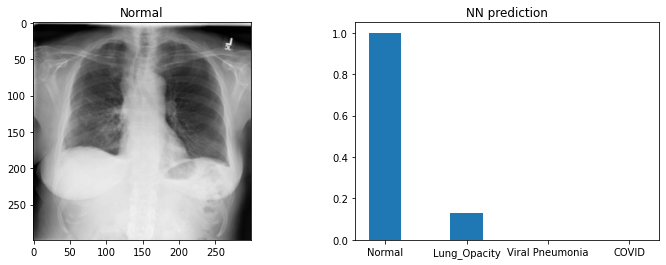

1.0554365
0.7259482
0.9283418
1.4276761
1.1698254


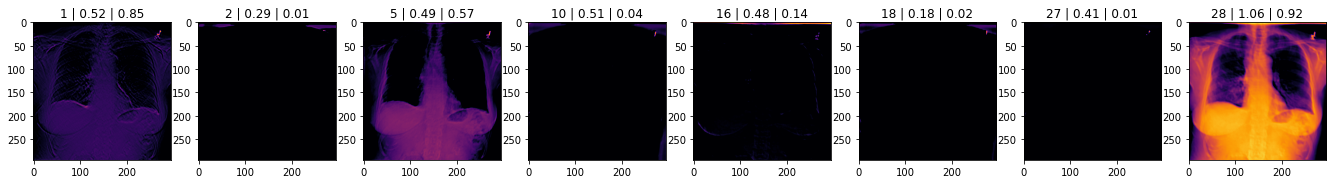

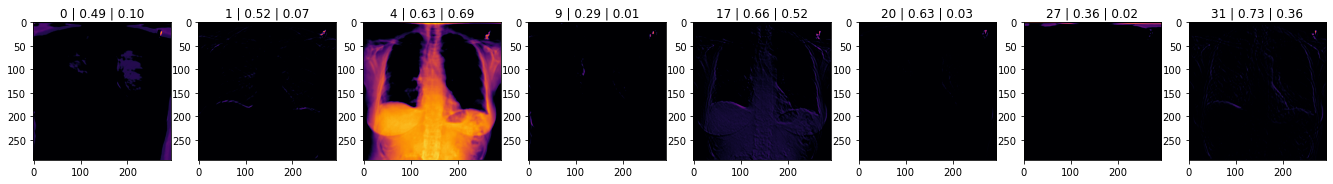

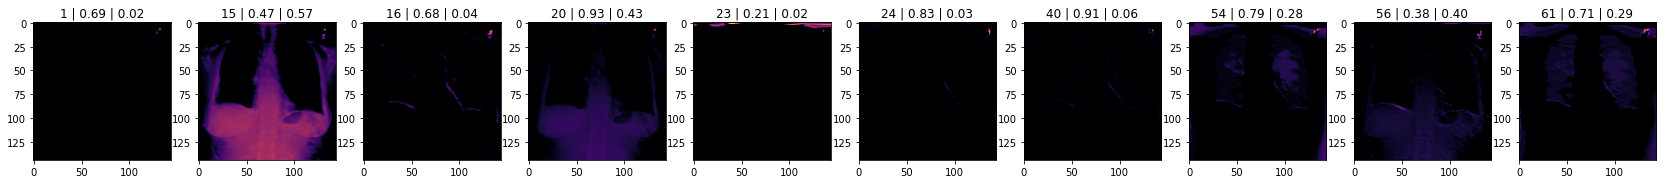

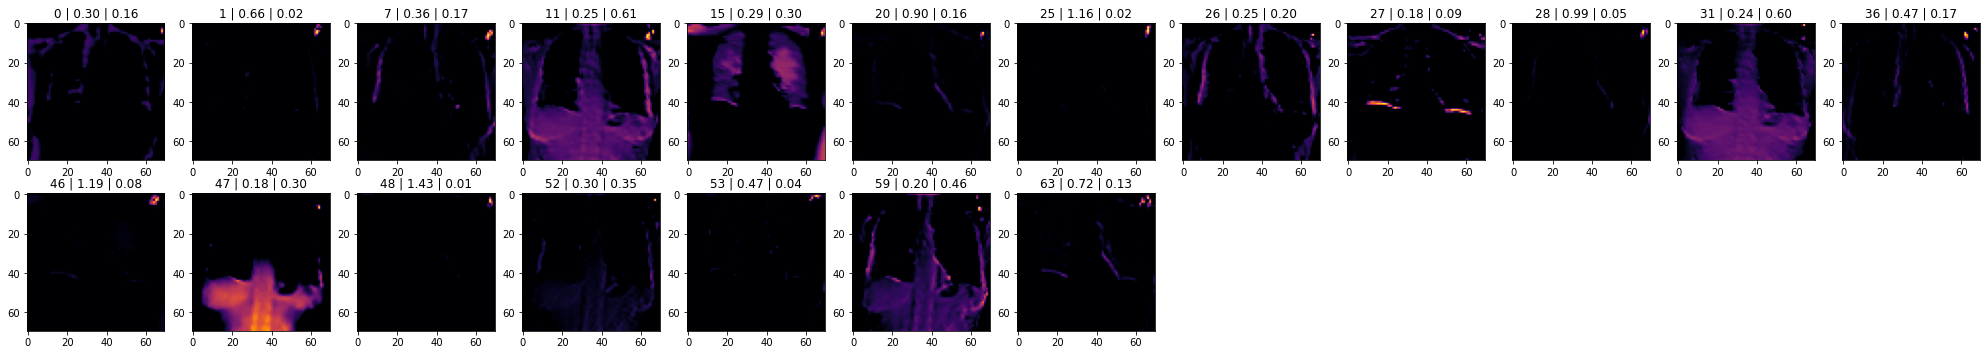

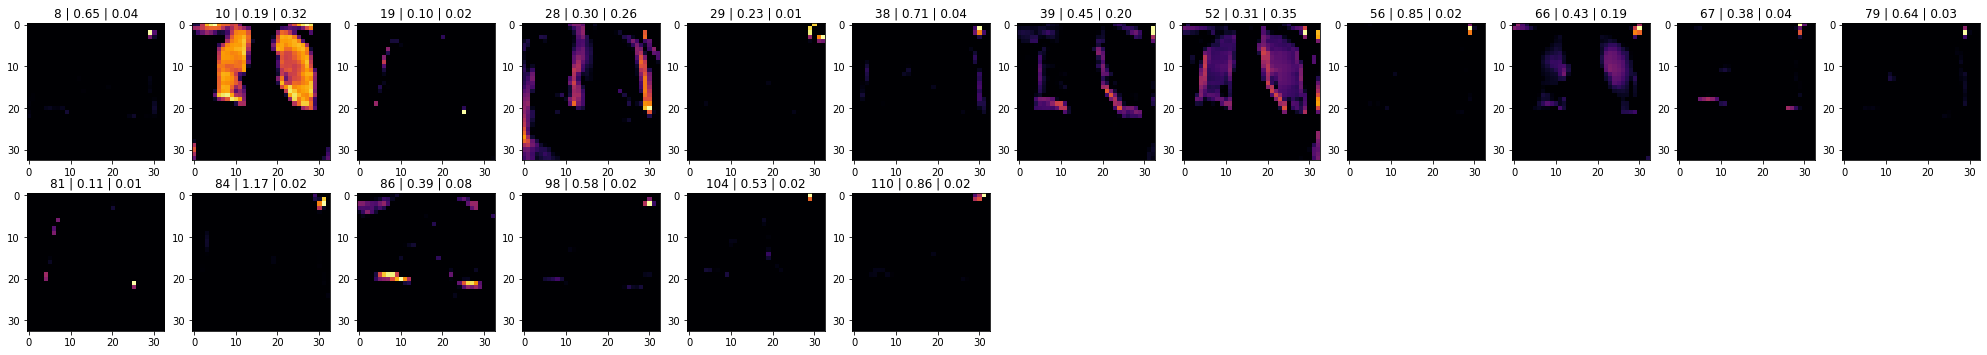

In [78]:
path = '6_2/epoch3.h5'
model = models.load_model('checkpoints/'+path)

# index = random.randrange(len(y))
index = 50
image_bits = X[index].reshape((1,299,299,1))
right_label = LABELS[np.where(y[index]==1)[0][0]]
prediction = model.predict(image_bits)

show_image_prediction(image_bits, prediction, LABELS, right_label)
show_inside_layers(model, image_bits, only_last=False, min_intensity=0.1, min_not_zero_pixels_count=0.01, use_image_max_value = True)

1116


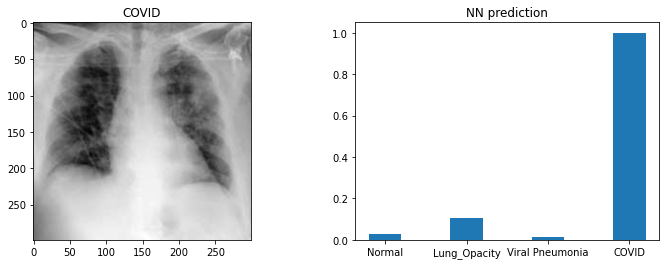

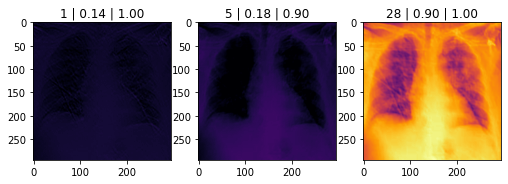

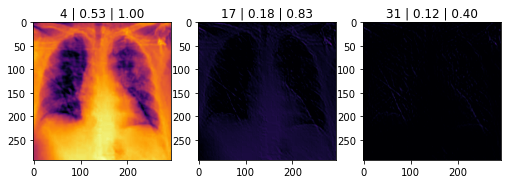

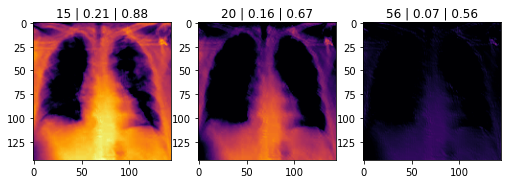

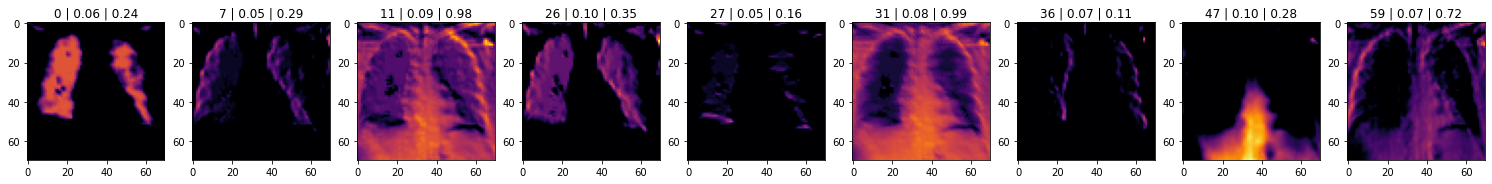

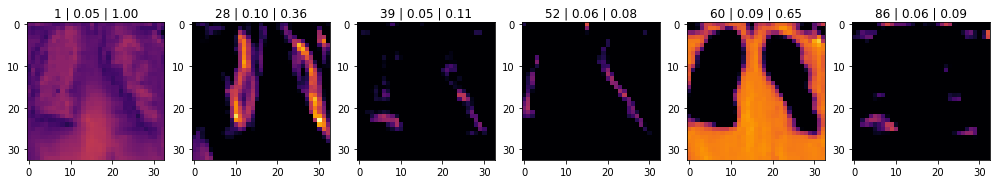

In [64]:
path = '6_2/epoch3.h5'
model = models.load_model('checkpoints/'+path)

index=930
image_bits = X[index].reshape((1,299,299,1))
right_label = LABELS[np.where(y[index]==1)[0][0]]
prediction = model.predict(image_bits)

show_image_prediction(image_bits, prediction, LABELS, right_label)
show_inside_layers(model, image_bits, only_last=False, min_intensity=0.05, min_not_zero_pixels_count=0.05, use_image_max_value = False)

951


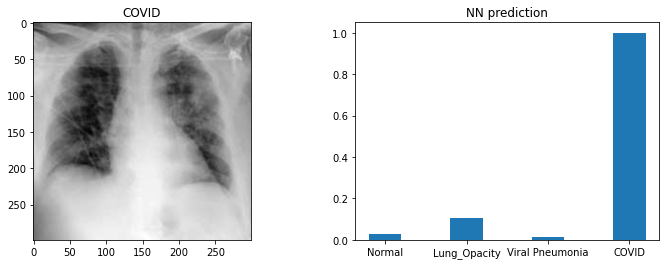

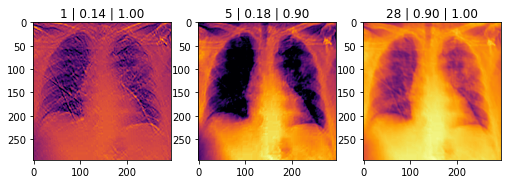

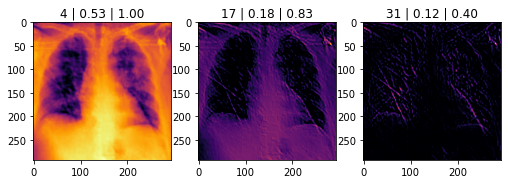

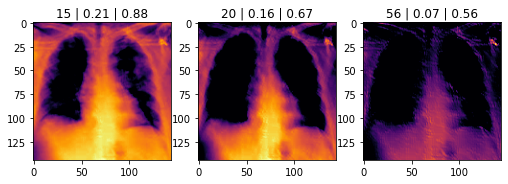

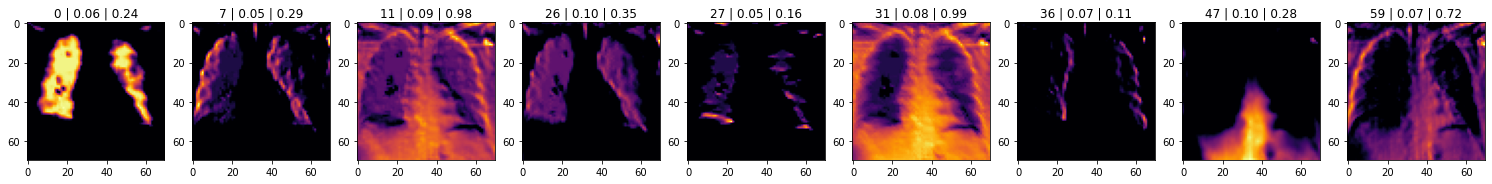

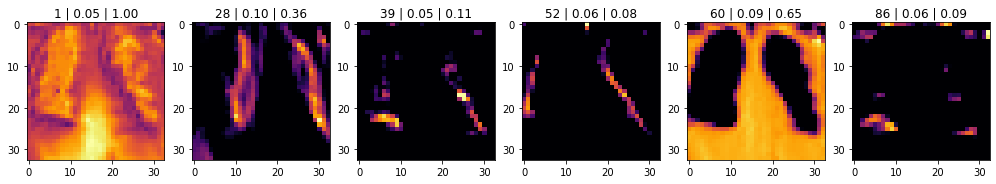

In [65]:
path = '6_2/epoch3.h5'
model = models.load_model('checkpoints/'+path)

index=930
image_bits = X[index].reshape((1,299,299,1))
right_label = LABELS[np.where(y[index]==1)[0][0]]
prediction = model.predict(image_bits)

show_image_prediction(image_bits, prediction, LABELS, right_label)
show_inside_layers(model, image_bits, only_last=False, min_intensity=0.05, min_not_zero_pixels_count=0.05, use_image_max_value = True)